In [2]:
import torch
import numpy as np
from IPython.display import Image

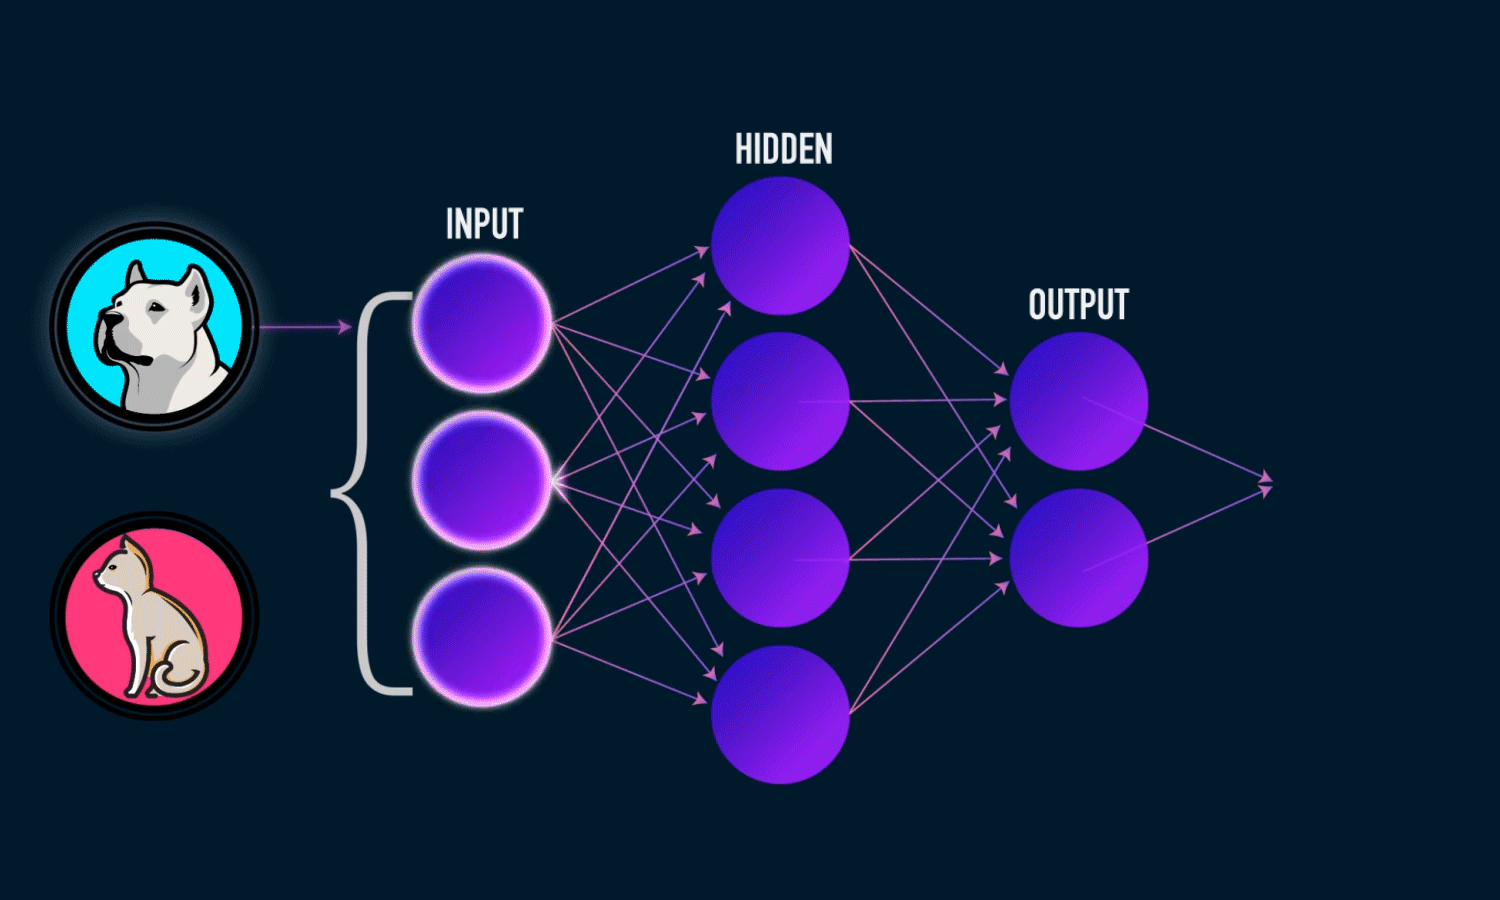

In [16]:
Image(filename="plots/neural_network.gif", width=500, height=500)

X*W + B

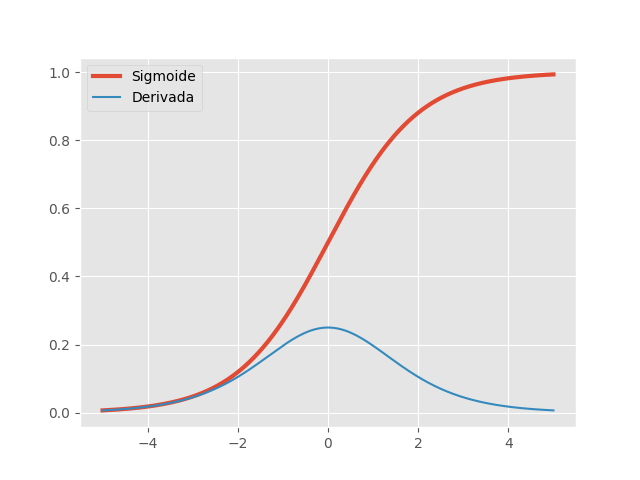

In [4]:
def sigmoid(x, derivative=False):
    if (derivative == True):
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

Image(filename="plots/sigmoid.png")

In [5]:
input = np.array([[-6]])
sigmoid(input)

array([[0.00247262]])

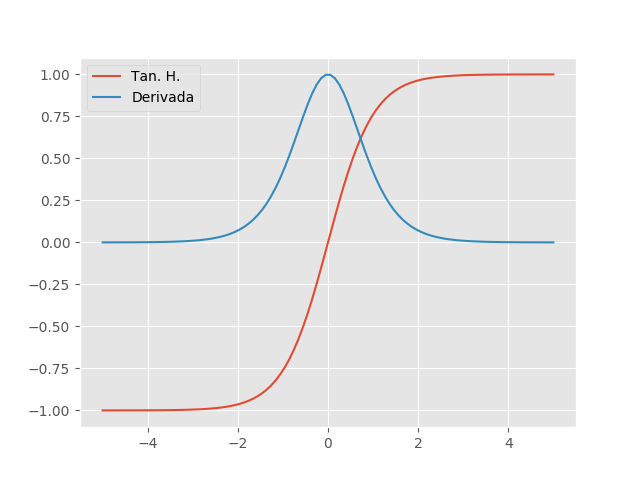

In [6]:
def tanh(x, derivative=False):
    if (derivative == True):
        return (1 - (x ** 2))
    return np.tanh(x)

Image(filename="plots/tanh.png")

In [7]:
input = np.array([[243]])

tanh(input)

array([[1.]])

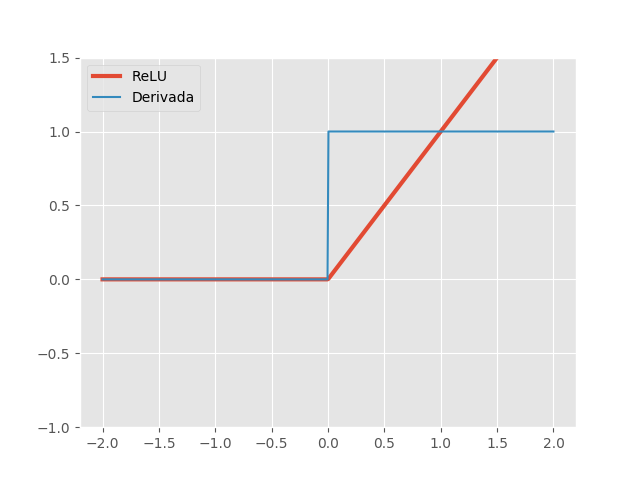

In [8]:
def relu(x, derivative=False):
    if (derivative == True):
        for i in range(0, len(x)):
            for k in range(len(x[i])):
                if x[i][k] > 0:
                    x[i][k] = 1
                else:
                    x[i][k] = 0
        return x
    for i in range(0, len(x)):
        for k in range(0, len(x[i])):
            if x[i][k] > 0:
                pass  # do nothing since it would be effectively replacing x with x
            else:
                x[i][k] = 0
    return x

Image(filename="plots/ReLU.png")

In [9]:
input = np.array([[-3]])
relu(input)

array([[0]])

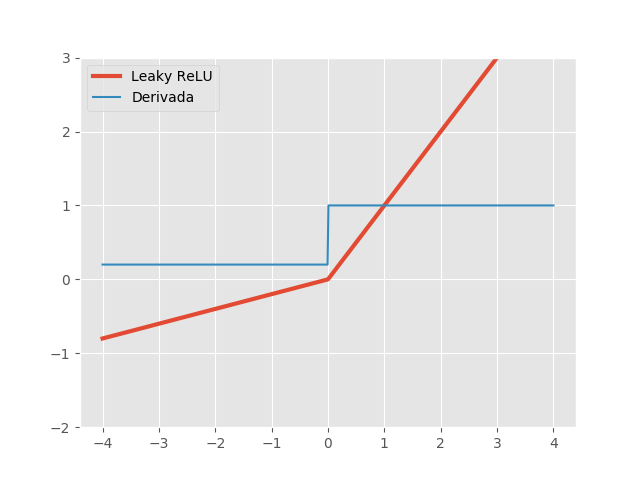

In [10]:
def leaky_relu(x, negative_slope=0.01, derivative=False):
    if (derivative == True):
        for i in range(0, len(x)):
            for k in range(len(x[i])):
                if x[i][k] > 0:
                    x[i][k] = 1
                else:
                    x[i][k] = negative_slope
        return x
    for i in range(0, len(x)):
        for k in range(0, len(x[i])):
            if x[i][k] > 0:
                pass  # do nothing since it would be effectively replacing x with x
            else:
                x[i][k] = x[i][k] * negative_slope
    return x

Image(filename="plots/leaky_relu.png")

In [11]:
# m = torch.nn.LeakyReLU(0.01)

input = np.array([[-64., -5]])
# input_tensor = torch.tensor(input)

# output = m(input_tensor)
output = leaky_relu(input.copy())

# print("input: {}".format(input))
# print("output (torch): {}".format(output.data.numpy()))
print("output: {}".format(output))

output: [[-0.64 -0.05]]


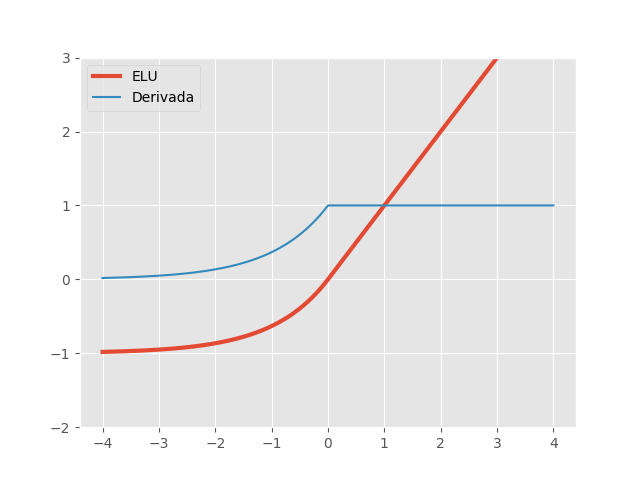

In [12]:
def elu(x, alpha=1.0, derivative=False):
    if (derivative == True):
        for i in range(0, len(x)):
            for k in range(len(x[i])):
                if x[i][k] > 0:
                    x[i][k] = 1
                else:
                    x[i][k] = elu(alpha=alpha, derivative=False) + alpha
        return x
    for i in range(0, len(x)):
        for k in range(0, len(x[i])):
            if x[i][k] > 0:
                pass  # do nothing since it would be effectively replacing x with x
            else:
                x[i][k] = alpha * ( np.exp(x[i][k]) -1 )
    return x

Image(filename="plots/elu.png")

In [13]:
input = np.array([[-55.]])
input_tensor = torch.tensor(input)

output = elu(input).copy()

print(output)
torch.nn.ELU()(input_tensor)

[[-1.]]


tensor([[-1.]], dtype=torch.float64)

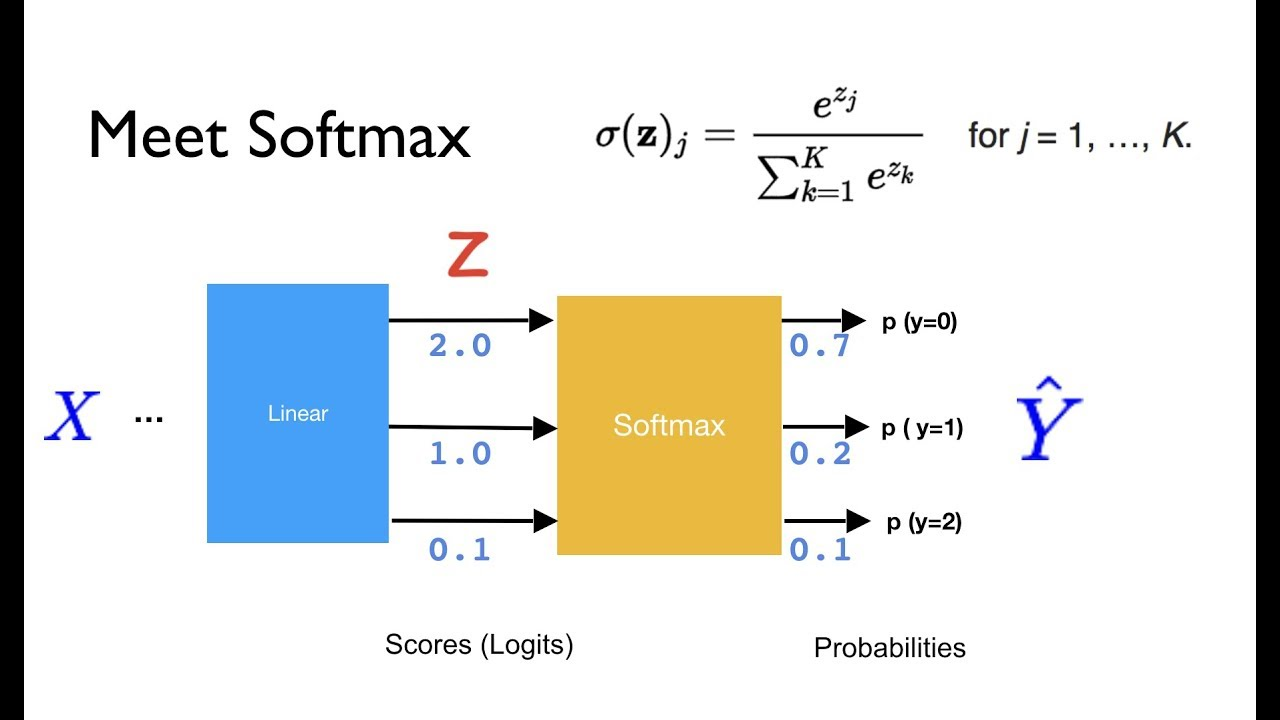

In [17]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

Image(filename="plots/softmax.png", width=500, height=500)

In [15]:
softmax([1, 9, 24])

array([1.02618765e-10, 3.05902227e-07, 9.99999694e-01])